In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display
import numpy as np

# Study data files
list_prices_path = "Resources/MedianListPrice.csv.csv"
list_prices = pd.read_csv(list_prices_path)
list_prices = list_prices.iloc[1:]
list_prices.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,549000.0,547667.0,544333.0,544333.0,545667.0,549000.0,549300.0,549300.0,549300.0,552333.0,555967.0,559300.0,561300.0,566333.0,574967.0,584967.0,592967.0,597967.0,599600.0,596600.0,594967.0,594667.0,597667.0,599000.0,599000.0,597667.0,591217.0,587883.0,587883.0,593000.0,596333.0,597967.0,606300.0,616300.0,631750.0,641417.0,648083.0,642333.0,634333.0,627967.0,632633.0,637633.0,640833.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,752933.0,756567.0,759233.0,758967.0,758667.0,762333.0,765667.0,767667.0,771298.0,779965.0,787965.0,794333.0,802333.0,816000.0,826000.0,829633.0,831300.0,838294.0,844661.0,849327.0,849296.0,849629.0,856296.0,864667.0,874667.0,874667.0,866333.0,856333.0,850000.0,850000.0,852267.0,864600.0,881100.0,903833.0,924800.0,941633.0,949966.0,949333.0,941000.0,931000.0,914997.0,906330.0,899330.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,309467.0,306465.0,302798.0,298998.0,295633.0,290967.0,284933.0,281633.0,284967.0,291633.0,297967.0,299600.0,301300.0,304633.0,307667.0,309300.0,306300.0,303267.0,298267.0,296567.0,299900.0,304900.0,309933.0,311633.0,313333.0,313000.0,307967.0,302933.0,299267.0,295933.0,289267.0,284933.0,287967.0,297667.0,309300.0,317967.0,323300.0,323399.0,320066.0,316733.0,313000.0,307967.0,301633.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,330133.0,328467.0,324966.0,321633.0,319933.0,319600.0,317967.0,314667.0,313633.0,315267.0,318600.0,321633.0,325633.0,330600.0,333233.0,334267.0,332633.0,331600.0,328600.0,328559.0,330293.0,335943.0,342650.0,350983.0,359667.0,367833.0,371166.0,373166.0,373333.0,376633.0,378300.0,381633.0,387667.0,394333.0,406000.0,416667.0,430000.0,436333.0,434667.0,427967.0,418300.0,409967.0,402967.0
5,394692,5,"Houston, TX",msa,TX,294467.0,297933.0,299633.0,299933.0,299633.0,297800.0,296165.0,293132.0,291632.0,289933.0,288300.0,289965.0,292665.0,297632.0,299300.0,299933.0,298966.0,295633.0,292316.0,289316.0,287650.0,286000.0,283333.0,284333.0,287666.0,293166.0,297133.0,301132.0,303966.0,307299.0,309967.0,313275.0,314308.0,314308.0,313666.0,315999.0,317666.0,323083.0,327750.0,332750.0,334667.0,333333.0,333333.0,333300.0,333300.0,331300.0,328000.0,328000.0,333667.0,343667.0,356333.0,364167.0,367500.0,364500.0,358000.0,352997.0,349663.0,346997.0


In [119]:
pd.options.display.max_columns = None
display(list_prices)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,549000.0,547667.0,544333.0,544333.0,545667.0,549000.0,549300.0,549300.0,549300.0,552333.0,555967.0,559300.0,561300.0,566333.0,574967.0,584967.0,592967.0,597967.0,599600.0,596600.0,594967.0,594667.0,597667.0,599000.0,599000.0,597667.0,591217.0,587883.0,587883.0,593000.0,596333.0,597967.0,606300.0,616300.0,631750.0,641417.0,648083.0,642333.0,634333.0,627967.0,632633.0,637633.0,640833.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,752933.0,756567.0,759233.0,758967.0,758667.0,762333.0,765667.0,767667.0,771298.0,779965.0,787965.0,794333.0,802333.0,816000.0,826000.0,829633.0,831300.0,838294.0,844661.0,849327.0,849296.0,849629.0,856296.0,864667.0,874667.0,874667.0,866333.0,856333.0,850000.0,850000.0,852267.0,864600.0,881100.0,903833.0,924800.0,941633.0,949966.0,949333.0,941000.0,931000.0,914997.0,906330.0,899330.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,309467.0,306465.0,302798.0,298998.0,295633.0,290967.0,284933.0,281633.0,284967.0,291633.0,297967.0,299600.0,301300.0,304633.0,307667.0,309300.0,306300.0,303267.0,298267.0,296567.0,299900.0,304900.0,309933.0,311633.0,313333.0,313000.0,307967.0,302933.0,299267.0,295933.0,289267.0,284933.0,287967.0,297667.0,309300.0,317967.0,323300.0,323399.0,320066.0,316733.0,313000.0,307967.0,301633.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,330133.0,328467.0,324966.0,321633.0,319933.0,319600.0,317967.0,314667.0,313633.0,315267.0,318600.0,321633.0,325633.0,330600.0,333233.0,334267.0,332633.0,331600.0,328600.0,328559.0,330293.0,335943.0,342650.0,350983.0,359667.0,367833.0,371166.0,373166.0,373333.0,376633.0,378300.0,381633.0,387667.0,394333.0,406000.0,416667.0,430000.0,436333.0,434667.0,427967.0,418300.0,409967.0,402967.0
5,394692,5,"Houston, TX",msa,TX,294467.0,297933.0,299633.0,299933.0,299633.0,297800.0,296165.0,293132.0,291632.0,289933.0,288300.0,289965.0,292665.0,297632.0,299300.0,299933.0,298966.0,295633.0,292316.0,289316.0,287650.0,286000.0,283333.0,284333.0,287666.0,293166.0,297133.0,301132.0,303966.0,307299.0,309967.0,313275.0,314308.0,314308.0,313666.0,315999.0,317666.0,323083.0,327750.0,332750.0,334667.0,333333.0,333333.0,333300.0,333300.0,331300.0,328000.0,328000.0,333667.0,343667.0,356333.0,364167.0,367500.0,364500.0,358000.0,352997.0,349663.0,346997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137083.0,131667.0,133332.0,149998.0,166665.0,158583.0,135580.0,112412.0,102828.0,99165.0,103967.0,109967.0,115200.

In [120]:
#Rename 2018 
list_prices = list_prices.rename(columns={"RegionName":"City",
                                          "2018-03-31":"2018 March",
                                          "2018-04-30":"2018 April",
                                          "2018-05-31":"2018 May",
                                          "2018-06-30":"2018 June",
                                          "2018-07-31":"2018 July",
                                          "2018-08-31":"2018 August",
                                          "2018-09-30":"2018 September",
                                          "2018-10-31":"2018 October",
                                          "2018-11-30":"2018 November",
                                          "2018-12-31":"2018 December"})

#Rename 2019
list_prices = list_prices.rename(columns={"2019-01-31":"2019 January",
                                          "2019-02-28":"2019 February",
                                          "2019-03-31":"2019 March",
                                          "2019-04-30":"2019 April",
                                          "2019-05-31":"2019 May",
                                          "2019-06-30":"2019 June",
                                          "2019-07-31":"2019 July",
                                          "2019-08-31":"2019 August",
                                          "2019-09-30":"2019 September",
                                          "2019-10-31":"2019 October",
                                          "2019-11-30":"2019 November",
                                          "2019-12-31":"2019 December"})

#Rename 2020
list_prices = list_prices.rename(columns={"2020-01-31":"2020 January",
                                          "2020-02-29":"2020 February",
                                          "2020-03-31":"2020 March",
                                          "2020-04-30":"2020 April",
                                          "2020-05-31":"2020 May",
                                          "2020-06-30":"2020 June",
                                          "2020-07-31":"2020 July",
                                          "2020-08-31":"2020 August",
                                          "2020-09-30":"2020 September",
                                          "2020-10-31":"2020 October",
                                          "2020-11-30":"2020 November",
                                          "2020-12-31":"2020 December"})
#Rename 2021
list_prices = list_prices.rename(columns={"2021-01-31":"2021 January",
                                          "2021-02-28":"2021 February",
                                          "2021-03-31":"2021 March",
                                          "2021-04-30":"2021 April",
                                          "2021-05-31":"2021 May",
                                          "2021-06-30":"2021 June",
                                          "2021-07-31":"2021 July",
                                          "2021-08-31":"2021 August",
                                          "2021-09-30":"2021 September",
                                          "2021-10-31":"2021 October",
                                          "2021-11-30":"2021 November",
                                          "2021-12-31":"2021 December"})
#Rename 2022
list_prices = list_prices.rename(columns={"2022-01-31":"2022 January",
                                          "2022-02-28":"2022 February",
                                          "2022-03-31":"2022 March",
                                          "2022-04-30":"2022 April",
                                          "2022-05-31":"2022 May",
                                          "2022-06-30":"2022 June",
                                          "2022-07-31":"2022 July",
                                          "2022-08-31":"2022 August",
                                          "2022-09-30":"2022 September",
                                          "2022-10-31":"2022 October",
                                          "2022-11-30":"2022 November",
                                          "2022-12-31":"2022 December"})

list_prices.head()

,RegionID,SizeRank,City,RegionType,StateName,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November,2022 December
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,549000.0,547667.0,544333.0,544333.0,545667.0,549000.0,549300.0,549300.0,549300.0,552333.0,555967.0,559300.0,561300.0,566333.0,574967.0,584967.0,592967.0,597967.0,599600.0,596600.0,594967.0,594667.0,597667.0,599000.0,599000.0,597667.0,591217.0,587883.0,587883.0,593000.0,596333.0,597967.0,606300.0,616300.0,631750.0,641417.0,648083.0,642333.0,634333.0,627967.0,632633.0,637633.0,640833.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,752933.0,756567.0,759233.0,758967.0,758667.0,762333.0,765667.0,767667.0,771298.0,779965.0,787965.0,794333.0,802333.0,816000.0,826000.0,829633.0,831300.0,838294.0,844661.0,849327.0,849296.0,849629.0,856296.0,864667.0,874667.0,874667.0,866333.0,856333.0,850000.0,850000.0,852267.0,864600.0,881100.0,903833.0,924800.0,941633.0,949966.0,949333.0,941000.0,931000.0,914997.0,906330.0,899330.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,309467.0,306465.0,302798.0,298998.0,295633.0,290967.0,284933.0,281633.0,284967.0,291633.0,297967.0,299600.0,301300.0,304633.0,307667.0,309300.0,306300.0,303267.0,298267.0,296567.0,299900.0,304900.0,309933.0,311633.0,313333.0,313000.0,307967.0,302933.0,299267.0,295933.0,289267.0,284933.0,287967.0,297667.0,309300.0,317967.0,323300.0,323399.0,320066.0,316733.0,313000.0,307967.0,301633.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,330133.0,328467.0,324966.0,321633.0,319933.0,319600.0,317967.0,314667.0,313633.0,315267.0,318600.0,321633.0,325633.0,330600.0,333233.0,334267.0,332633.0,331600.0,328600.0,328559.0,330293.0,335943.0,342650.0,350983.0,359667.0,367833.0,371166.0,373166.0,373333.0,376633.0,378300.0,381633.0,387667.0,394333.0,406000.0,416667.0,430000.0,436333.0,434667.0,427967.0,418300.0,409967.0,402967.0
5,394692,5,"Houston, TX",msa,TX,294467.0,297933.0,299633.0,299933.0,299633.0,297800.0,296165.0,293132.0,291632.0,289933.0,288300.0,289965.0,292665.0,297632.0,299300.0,299933.0,298966.0,295633.0,292316.0,289316.0,287650.0,286000.0,283333.0,284333.0,287666.0,293166.0,297133.0,301132.0,303966.0,307299.0,309967.0,313275.0,314308.0,314308.0,313666.0,315999.0,317666.0,323083.0,327750.0,332750.0,334667.0,333333.0,333333.0,333300.0,333300.0,331300.0,328000.0,328000.0,333667.0,343667.0,356333.0,364167.0,367500.0,364500.0,358000.0,352997.0,349663.0,346997.0


In [121]:
#Reduce DF
list_reduced = pd.DataFrame(list_prices[["City",
                                         "2018 March",
                                         "2018 April",
                                         "2018 May",
                                         "2018 June",
                                         "2018 July",
                                         "2018 August",
                                         "2018 September",
                                         "2018 October",
                                         "2018 November",
                                         "2018 December",
                                         "2019 January",
                                         "2019 February",
                                         "2019 March",
                                         "2019 April",
                                         "2019 May",
                                         "2019 June",
                                         "2019 July",
                                         "2019 August",
                                         "2019 September",
                                         "2019 October",
                                         "2019 November",
                                         "2019 December",
                                         "2020 January",
                                         "2020 February",
                                         "2020 March",
                                         "2020 April",
                                         "2020 May",
                                         "2020 June",
                                         "2020 July",
                                         "2020 August",
                                         "2020 September",
                                         "2020 October",
                                         "2020 November",
                                         "2020 December",
                                         "2021 January",
                                         "2021 February",
                                         "2021 March",
                                         "2021 April",
                                         "2021 May",
                                         "2021 June",
                                         "2021 July",
                                         "2021 August",
                                         "2021 September",
                                         "2021 October",
                                         "2021 November",
                                         "2021 December",
                                         "2022 January",
                                         "2022 February",
                                         "2022 March",
                                         "2022 April",
                                         "2022 May",
                                         "2022 June",
                                         "2022 July",
                                         "2022 August",
                                         "2022 September",
                                         "2022 October",
                                         "2022 November",
                                         "2022 December"]])
#Set index to City 
list_reduced = list_reduced.set_index("City")
list_reduced.head()

,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November,2022 December
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"New York, NY",503000.0,513000.0,521300.0,526300.0,528300.0,526600.0,526267.0,527600.0,529000.0,527667.0,524667.0,524667.0,528000.0,537667.0,544333.0,549000.0,547667.0,544333.0,544333.0,545667.0,549000.0,549300.0,549300.0,549300.0,552333.0,555967.0,559300.0,561300.0,566333.0,574967.0,584967.0,592967.0,597967.0,599600.0,596600.0,594967.0,594667.0,597667.0,599000.0,599000.0,597667.0,591217.0,587883.0,587883.0,593000.0,596333.0,597967.0,606300.0,616300.0,631750.0,641417.0,648083.0,642333.0,634333.0,627967.0,632633.0,637633.0,640833.0
"Los Angeles, CA",721333.0,735000.0,743333.0,750000.0,749667.0,742967.0,736267.0,728267.0,724633.0,719667.0,711300.0,711600.0,716267.0,732633.0,742667.0,752933.0,756567.0,759233.0,758967.0,758667.0,762333.0,765667.0,767667.0,771298.0,779965.0,787965.0,794333.0,802333.0,816000.0,826000.0,829633.0,831300.0,838294.0,844661.0,849327.0,849296.0,849629.0,856296.0,864667.0,874667.0,874667.0,866333.0,856333.0,850000.0,850000.0,852267.0,864600.0,881100.0,903833.0,924800.0,941633.0,949966.0,949333.0,941000.0,931000.0,914997.0,906330.0,899330.0
"Chicago, IL",284600.0,294600.0,300600.0,302267.0,301967.0,297933.0,296117.0,292783.0,288483.0,283333.0,280000.0,284300.0,291267.0,301267.0,306300.0,309467.0,306465.0,302798.0,298998.0,295633.0,290967.0,284933.0,281633.0,284967.0,291633.0,297967.0,299600.0,301300.0,304633.0,307667.0,309300.0,306300.0,303267.0,298267.0,296567.0,299900.0,304900.0,309933.0,311633.0,313333.0,313000.0,307967.0,302933.0,299267.0,295933.0,289267.0,284933.0,287967.0,297667.0,309300.0,317967.0,323300.0,323399.0,320066.0,316733.0,313000.0,307967.0,301633.0
"Dallas, TX",322997.0,328497.0,331797.0,332800.0,329502.0,324202.0,321168.0,318966.0,317633.0,315999.0,313333.0,313667.0,316967.0,323633.0,328467.0,330133.0,328467.0,324966.0,321633.0,319933.0,319600.0,317967.0,314667.0,313633.0,315267.0,318600.0,321633.0,325633.0,330600.0,333233.0,334267.0,332633.0,331600.0,328600.0,328559.0,330293.0,335943.0,342650.0,350983.0,359667.0,367833.0,371166.0,373166.0,373333.0,376633.0,378300.0,381633.0,387667.0,394333.0,406000.0,416667.0,430000.0,436333.0,434667.0,427967.0,418300.0,409967.0,402967.0
"Houston, TX",294467.0,297933.0,299633.0,299933.0,299633.0,297800.0,296165.0,293132.0,291632.0,289933.0,288300.0,289965.0,292665.0,297632.0,299300.0,299933.0,298966.0,295633.0,292316.0,289316.0,287650.0,286000.0,283333.0,284333.0,287666.0,293166.0,297133.0,301132.0,303966.0,307299.0,309967.0,313275.0,314308.0,314308.0,313666.0,315999.0,317666.0,323083.0,327750.0,332750.0,334667.0,333333.0,333333.0,333300.0,333300.0,331300.0,328000.0,328000.0,333667.0,343667.0,356333.0,364167.0,367500.0,364500.0,358000.0,352997.0,349663.0,346997.0


In [122]:
dates=list_reduced.columns
print(dates)

Index(['2018 March', '2018 April', '2018 May', '2018 June', '2018 July',
       '2018 August', '2018 September', '2018 October', '2018 November',
       '2018 December', '2019 January', '2019 February', '2019 March',
       '2019 April', '2019 May', '2019 June', '2019 July', '2019 August',
       '2019 September', '2019 October', '2019 November', '2019 December',
       '2020 January', '2020 February', '2020 March', '2020 April', '2020 May',
       '2020 June', '2020 July', '2020 August', '2020 September',
       '2020 October', '2020 November', '2020 December', '2021 January',
       '2021 February', '2021 March', '2021 April', '2021 May', '2021 June',
       '2021 July', '2021 August', '2021 September', '2021 October',
       '2021 November', '2021 December', '2022 January', '2022 February',
       '2022 March', '2022 April', '2022 May', '2022 June', '2022 July',
       '2022 August', '2022 September', '2022 October', '2022 November',
       '2022 December'],
      dtype='object')


In [123]:
philadelphia_df = list_reduced.loc["Philadelphia, PA"]
dallas_df = list_reduced.loc["Dallas, TX"]
phoenix_df = list_reduced.loc["Phoenix, AZ"]
san_antonio_df = list_reduced.loc["San Antonio, TX"]
san_diego_df = list_reduced.loc["San Diego, CA"]

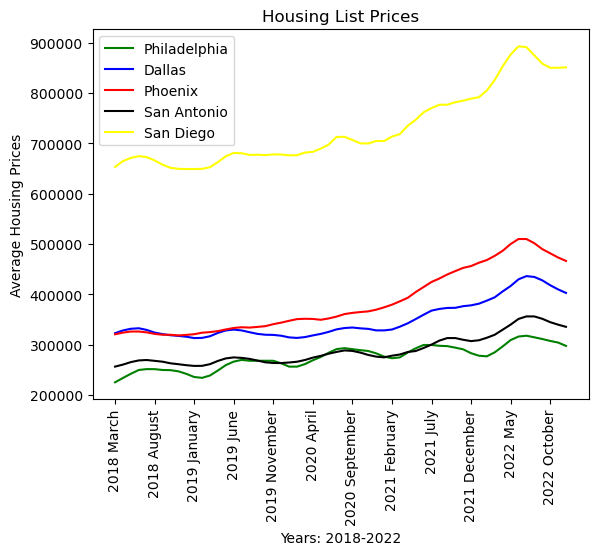

In [124]:
x = np.arange(0, len(philadelphia_df))
plt.plot(dates, philadelphia_df, color="green", label="Philadelphia")
plt.plot(dates, dallas_df, color="blue", label="Dallas")
plt.plot(dates, phoenix_df, color="red", label="Phoenix")
plt.plot(dates, san_antonio_df, color="black", label="San Antonio")
plt.plot(dates, san_diego_df, color="yellow", label="San Diego")
plt.title("Housing List Prices")
plt.xlabel("Years: 2018-2022")
plt.xticks(range(0, 60, 5), rotation = 90)
plt.ylabel("Average Housing Prices")
plt.legend()

In [125]:
plt.savefig("output_data/Fig2.png")

<Figure size 640x480 with 0 Axes>